In [1]:
import pandas as pd
import numpy as np
import rasterio as rio 
import os
import pkg_resources


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

from ShallowLearn import LoadData
from ShallowLearn.band_mapping import band_mapping



import seaborn as sns


In [2]:
def preprocess_data(data):
    loaded_data = LoadData.LoadFromCSV(data)
    specific_reef = loaded_data.load_specific_reef(6880)
    return np.array(specific_reef)

def reshape_data(data):
    # shape = data.shape
    dim_0 = data.shape[0] * data.shape[2] * data.shape[3] 
    channels = data.shape[1]
    return data.reshape(dim_0, channels)


In [3]:
path = pkg_resources.resource_filename('ShallowLearn', '../Data/Clear_Reefs.csv')
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())


(20906100, 13)


In [4]:
X_train = X_train.drop_duplicates()


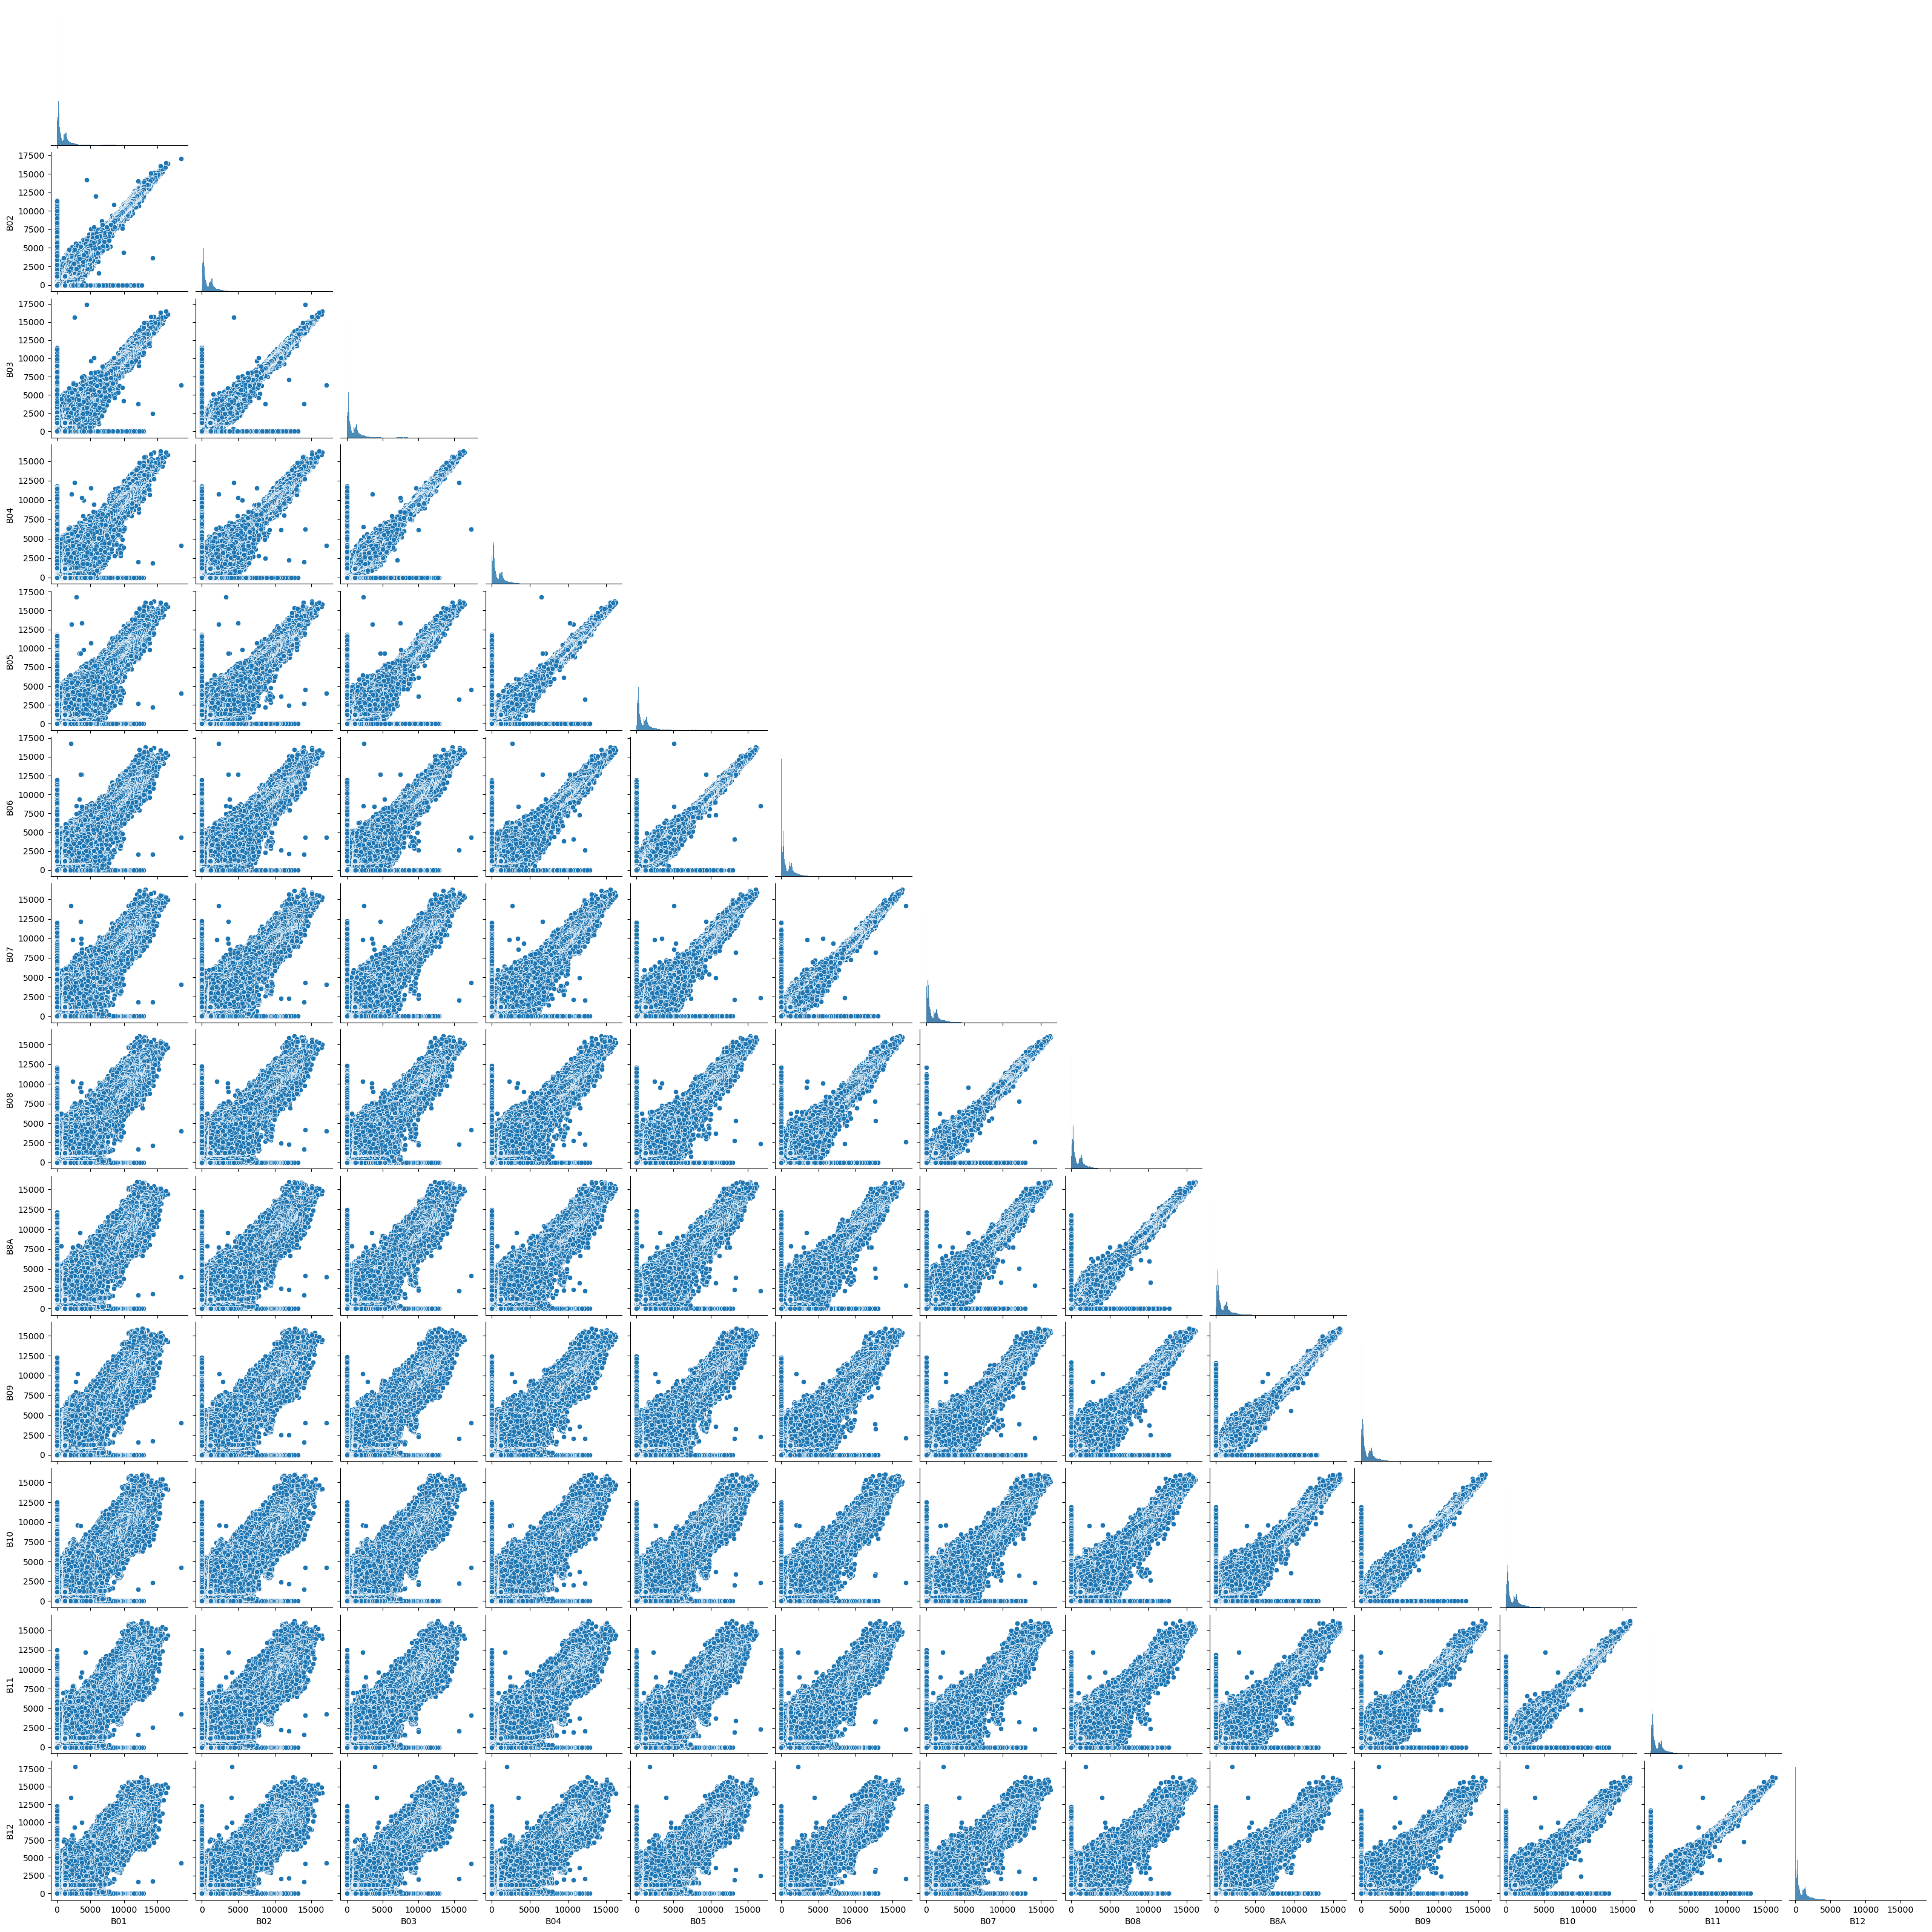

In [8]:
sns.pairplot(X_train, corner = True)

In [5]:
from sklearn import manifold

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn import decomposition

In [9]:
X_train.head()

B01   B02   B03   B04   B05   B06   B07   B08   B8A   B09   B10   B11  \
0      0     0     0     0     0     0     0     0     0     0     0     0   
55     0     0     0     0     0     0     0  1462  1453  1448  1451  1460   
56  1488  1505  1524  1543  1567  1594  1622  1645  1663  1671  1671  1665   
57  1643  1633  1624  1617  1609  1601  1591  1581  1568  1551  1533  1514   
58  1482  1472  1465  1461  1458  1457  1455  1453  1452  1451  1451  1451   

     B12  
0      0  
55  1472  
56  1655  
57  1497  
58  1450

In [10]:
scaler = StandardScaler()

<Axes: xlabel='0', ylabel='1'>

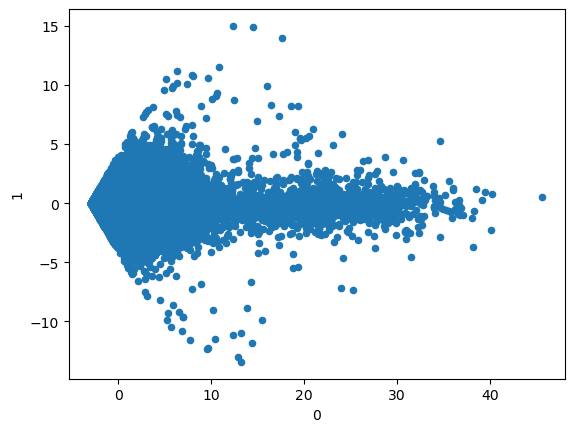

In [11]:
pixel_df = scaler.fit_transform(X_train)
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
pca = decomposition.PCA(n_components = 2, random_state = 42)
sample_data = pixel_df.sample(100_000, random_state = 42)
pca_data = pca.fit_transform(sample_data)
pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

In [12]:
tsne = manifold.TSNE(n_components = 2, random_state = 42, verbose = 2, n_iter = 2000)
transformed_data = tsne.fit_transform(sample_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.153s...
[t-SNE] Computed neighbors for 100000 samples in 8.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probabi

<Axes: xlabel='0', ylabel='1'>

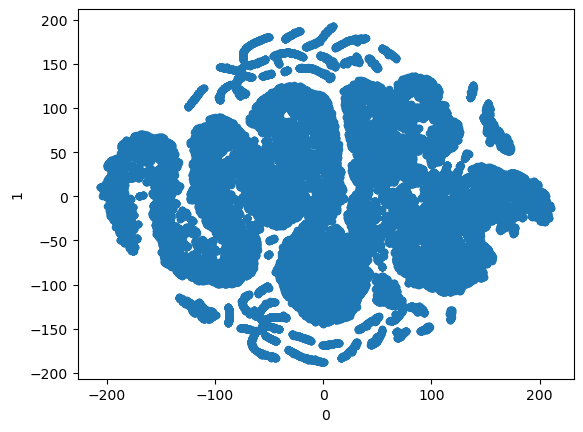

In [13]:
pd.DataFrame(transformed_data).plot.scatter(x = 0, y = 1)

In [14]:
#X_train_tsne_tf = tsne.fit_transform(pixel_df)

In [15]:
import matplotlib.pyplot as plt

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


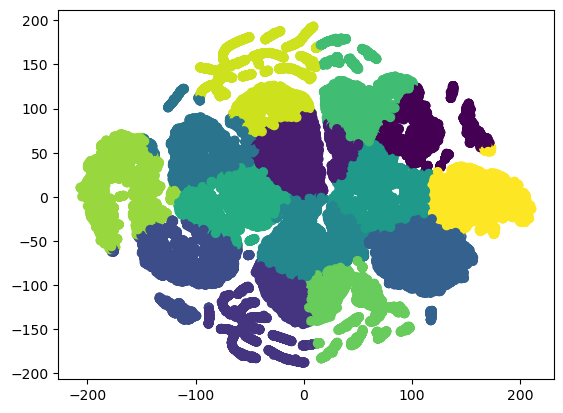

In [16]:
kmeans = KMeans(n_clusters=14)
kmeans.fit(transformed_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

In [33]:
#X_train = X_train.drop(columns = ["B10"], axis = 1)


In [36]:
#del band_mapping['B10']

<Axes: xlabel='0', ylabel='1'>

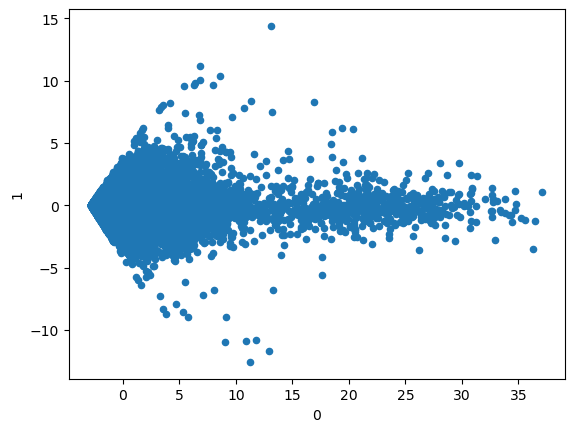

In [37]:
pixel_df = StandardScaler().fit_transform(X_train)
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
pca = decomposition.PCA(n_components = 2, random_state = 42)
sample_data = pixel_df.sample(50_000, random_state = 42)
pca_data = pca.fit_transform(sample_data)
pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

In [38]:
tsne = manifold.TSNE(n_components = 2, random_state = 42, verbose = 2, n_iter = 2000)
transformed_data = tsne.fit_transform(sample_data)

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.046s...
[t-SNE] Computed neighbors for 50000 samples in 2.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sam

In [370]:
n_classes = 14

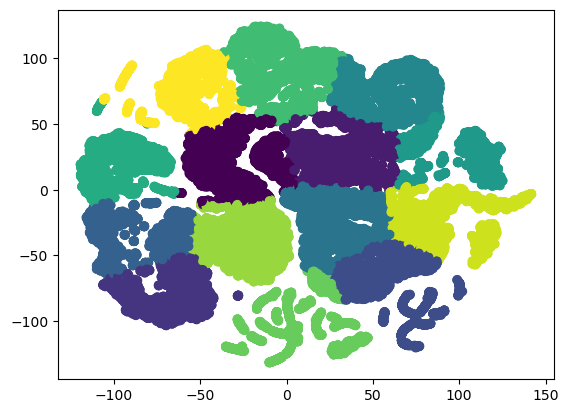

In [39]:
kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(transformed_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

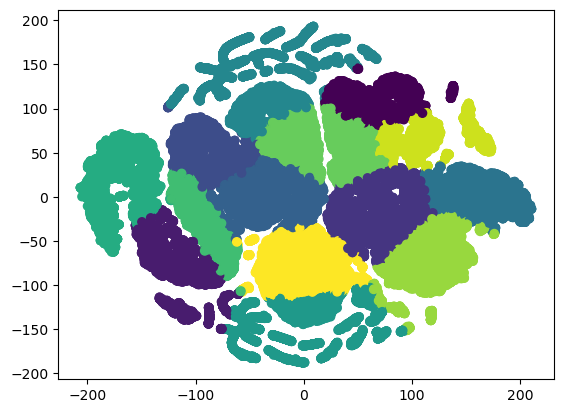

In [182]:
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture Model with 14 components
gmm = GaussianMixture(n_components=n_classes)
gmm.fit(transformed_data)
labels = gmm.predict(transformed_data)

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

In [43]:
sample_data['labels'] = labels

In [46]:
sample_data.drop(columns = ['labels'], axis = 1, inplace = True)

In [17]:
from xgboost import XGBClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [53]:
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)


(20906100, 13)


In [54]:
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())

In [55]:
X_train.drop(columns = ["B10"], axis = 1, inplace = True)

In [56]:
scaler.fit(X_train)

StandardScaler()

In [98]:
from ShallowLearn.band_mapping import band_mapping

In [99]:
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())

ValueError: Shape of passed values is (20906100, 13), indices imply (20906100, 12)

In [32]:
sample_data.drop(columns = ['B10'], axis = 1, inplace = True)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(sample_data,labels, test_size=.2)

In [281]:
#scaler = StandardScaler().fit(X_train)

In [346]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax', num_class=len(np.unique(labels)))

In [347]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=0, num_class=14,
              num_parallel_tree=1, objective='multi:softmax', ...)

In [348]:
preds = bst.predict(X_test)

In [349]:
from sklearn.metrics import roc_auc_score

In [350]:
bst.predict_proba(X_test).shape

(20000, 14)

In [351]:
roc_auc_score(y_test, bst.predict_proba(X_test), multi_class='ovr')

0.9547684353646471

In [352]:
from sklearn.metrics import confusion_matrix

In [353]:
cm = confusion_matrix(y_test, preds)

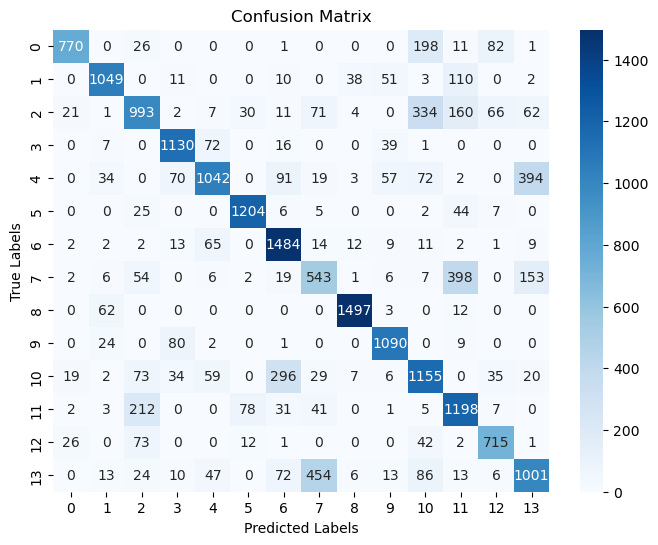

In [354]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [470]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [471]:
from ShallowLearn import ImageHelper

In [528]:
img_test = ImageHelper.load_img(dir_list[11])

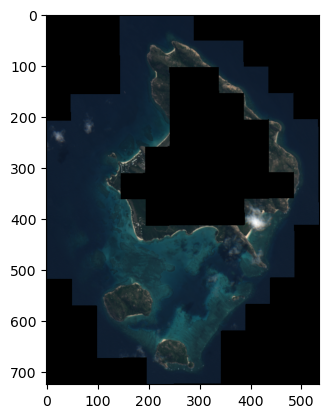

In [529]:
ImageHelper.plot_rgb(img_test, plot = True)

In [530]:
img_test = ImageHelper.remove_channel(img_test, 10)

In [531]:
original_shape = img_test.shape

In [532]:
original_shape

(725, 534, 12)

In [533]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [534]:
test_pred = bst.predict(scaler.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [535]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

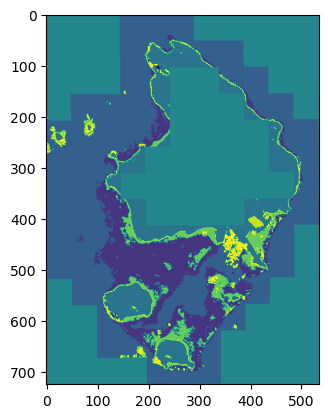

In [536]:
plt.imshow(test_pred)

In [537]:

# specify the directory path
dir_path = '/media/ziad/Expansion/Honduras_Clipped'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [542]:
img_num = 1
img_test = ImageHelper.load_img(dir_list[img_num])

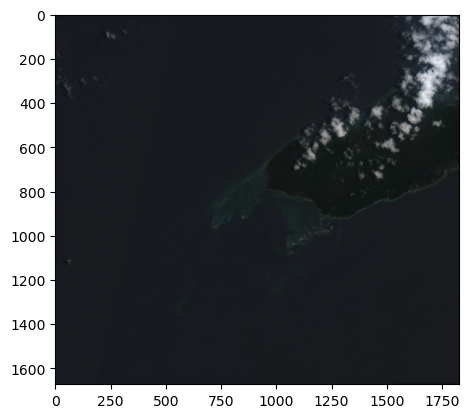

In [543]:
ImageHelper.plot_rgb(img_test, plot = True)

In [544]:
#img_test = ImageHelper.remove_channel(img_test, 10)
original_shape = img_test.shape

In [545]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [546]:
test_pred = bst.predict(scaler.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [547]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

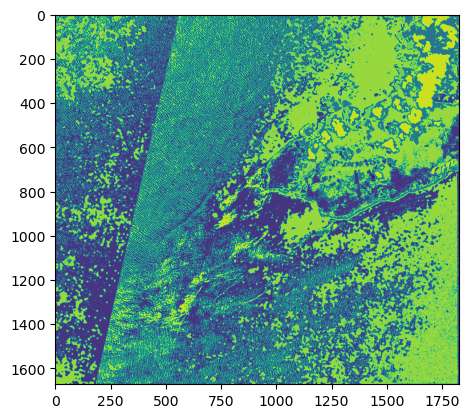

In [548]:
plt.imshow(test_pred)

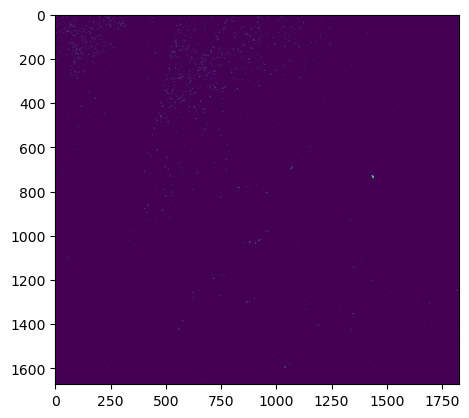

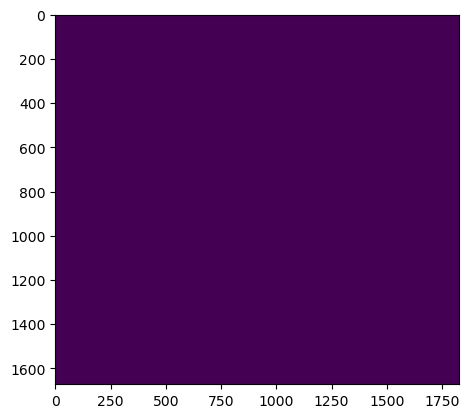

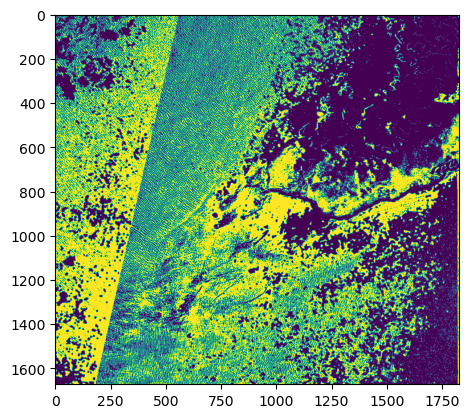

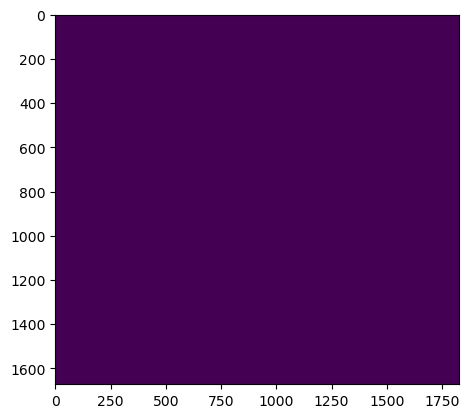

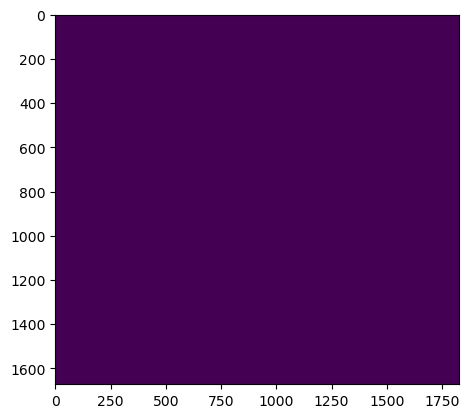

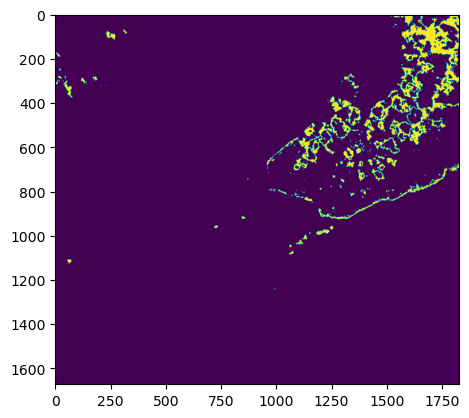

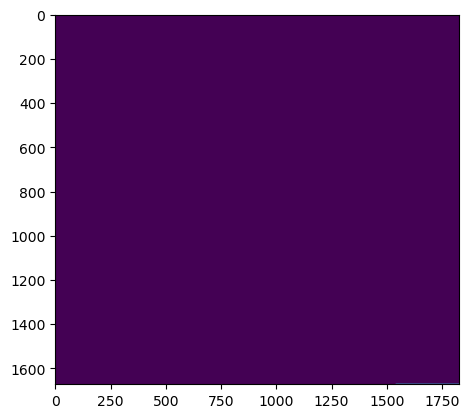

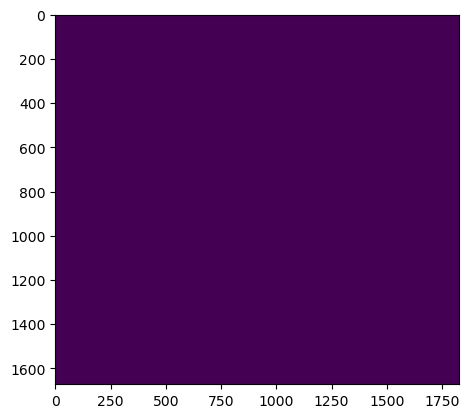

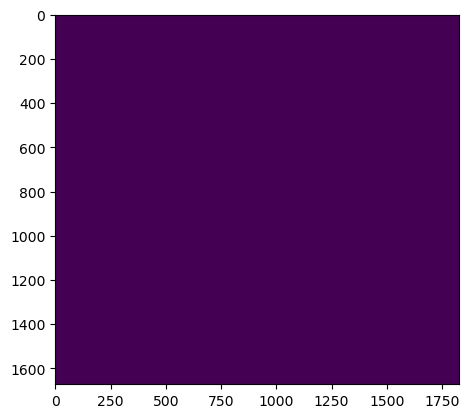

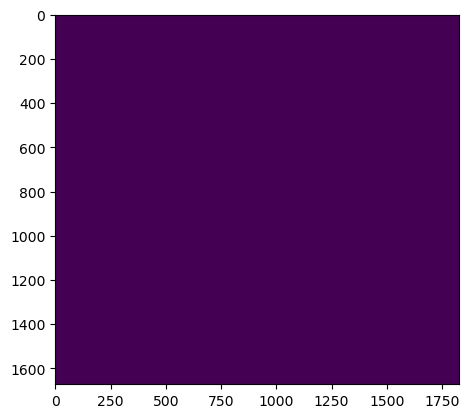

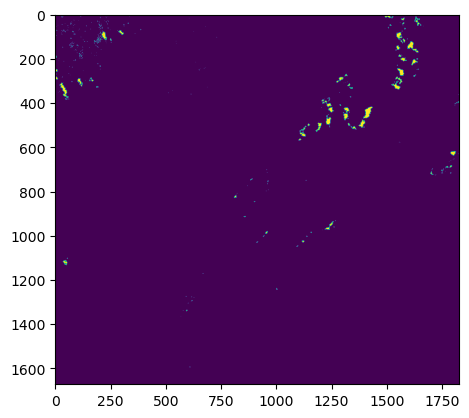

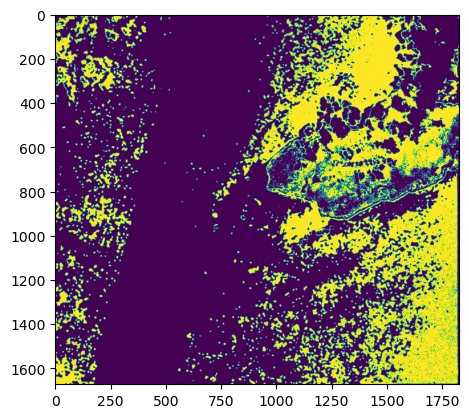

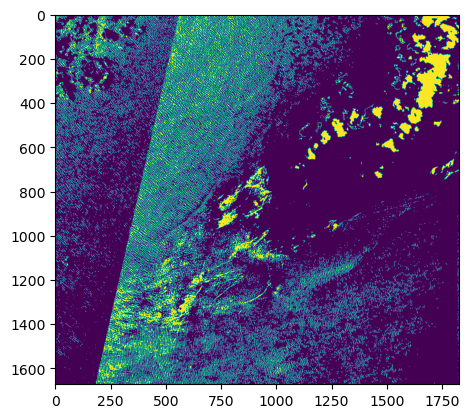

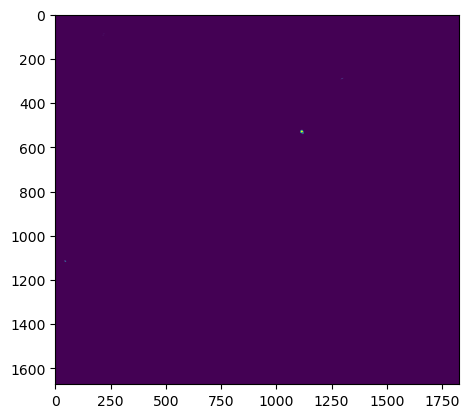

In [549]:
for i in range(n_classes):

    plt.imshow(test_pred==i)
    plt.show()

In [179]:
bm = list(band_mapping.keys())
del bm[-3]

In [180]:
bm

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B11',
 'B12']

<Axes: >

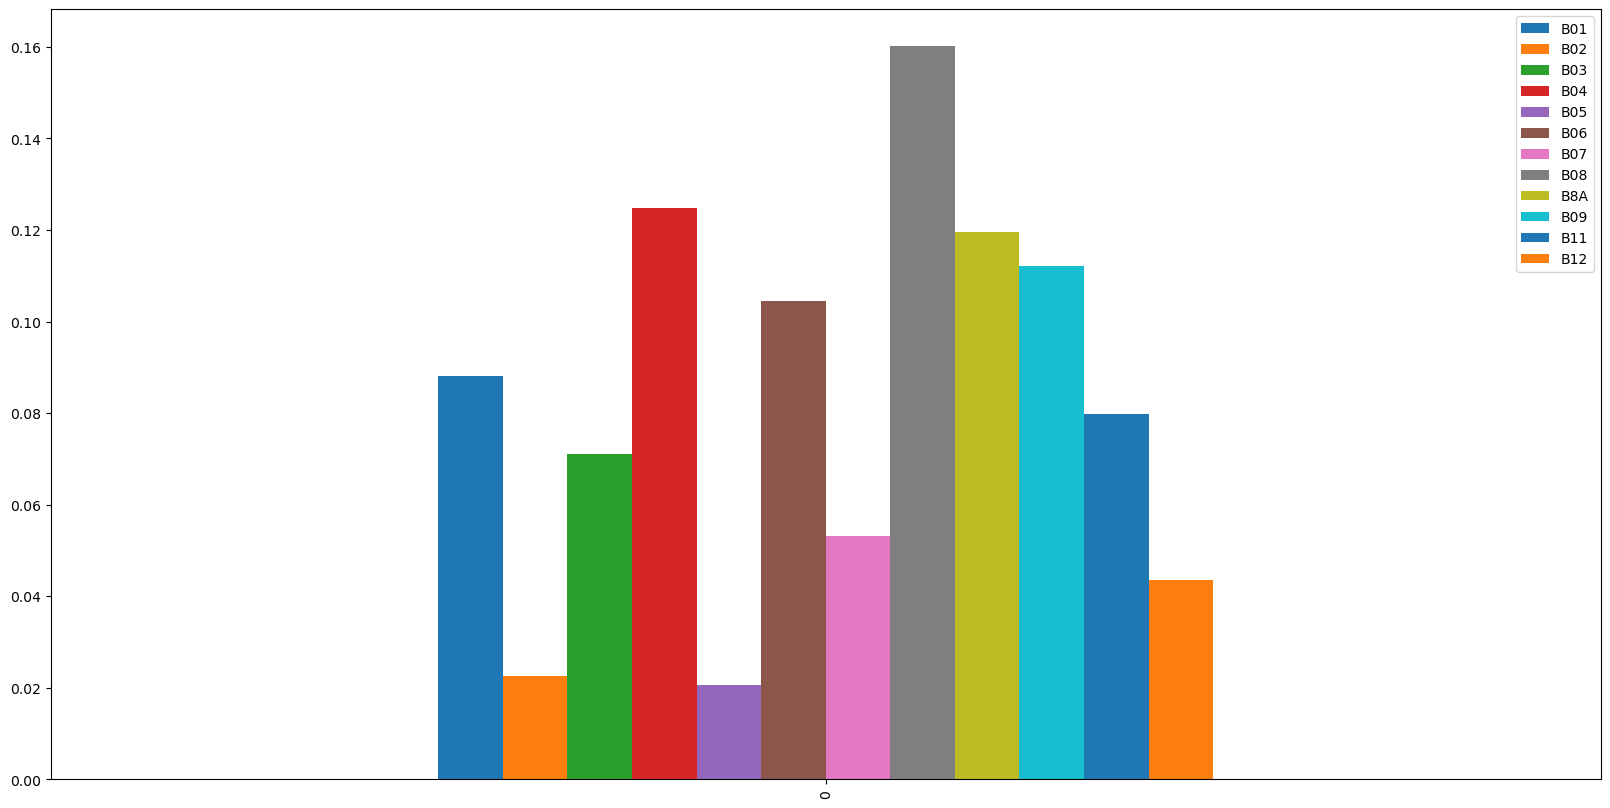

In [277]:
pd.DataFrame(np.expand_dims(bst.feature_importances_, axis = 1).T, columns = bm).plot(kind = 'bar', figsize = (20,10))